# Q4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/home/sagrika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


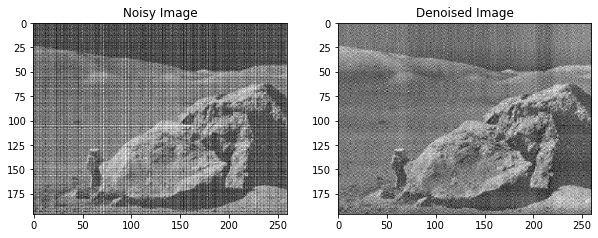

In [2]:
im =cv2.imread('../input_data/land.png', 0)

im_fft = np.fft.fft2(im)
keep_fraction = 0.1
im_fft = np.fft.fftshift(im_fft)

def plot_spec(im):
    plt.imshow(np.abs(im), norm = LogNorm(vmin=5))
    plt.colorbar()

m, n = im_fft.shape
# print(im_fft.shape)

im_fft[m//4,:] = 0
im_fft[m//2,:] = 0
im_fft[3*m//4,:] = 0
im_fft[:, n//4] = 0
im_fft[:, n//2] = 0
im_fft[:, 3*n//4] = 0
out = np.fft.ifft2(np.fft.ifftshift(im_fft)).real

# plot_spec(im_fft)

fig = plt.figure(figsize=(10,10))
out = np.fft.ifft2(np.fft.ifftshift(im_fft)).real
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title("Noisy Image")
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.title("Denoised Image")
fig.show()

When we plot the frequency spectrum of the image, we see that the high frequency components (i.e. the noise) is more in these regions (n/4th row, n/4th column etc) hence we set those frequency components to zero. This results in a denoised image.